Nama : Devita Abellia Rahmawati

NIM : 4112321010

Matkul : Machine Learning


# PACKAGE

In [41]:
import pandas as pd
import numpy as np

import os

import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATA

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
folder_path = "/content/drive/MyDrive/Machine Learning/Data"

# Mengecek ada file apa saja di `folder_path`
os.listdir(folder_path)

['2021.csv',
 '2022.csv',
 '2015.csv',
 '2019.csv',
 '2018.csv',
 '2020.csv',
 '2017.csv',
 '2016.csv']

In [9]:
# Mendefinisikan path ke folder tempat file CSV disimpan
path_file_2022 = os.path.join(folder_path, '2022.csv')

# Membaca file CSV dan menyimpan isi ke dalam DataFrame sesuai dengan value `path_file_2022`
df_2022 = pd.read_csv(path_file_2022)

In [10]:
df_2022.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df_2022.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype 
---  ------                                      --------------  ----- 
 0   RANK                                        147 non-null    int64 
 1   Country                                     147 non-null    object
 2   Happiness score                             146 non-null    object
 3   Whisker-high                                146 non-null    object
 4   Whisker-low                                 146 non-null    object
 5   Dystopia (1.83) + residual                  146 non-null    object
 6   Explained by: GDP per capita                146 non-null    object
 7   Explained by: Social support                146 non-null    object
 8   Explained by: Healthy life expectancy       146 non-null    object
 9   Explained by: Freedom to make life choices  146 non-null    object
 10  Explained by: Generosity  

In [12]:
# drop Country tanpa Happiness Score
df_2022 = df_2022.dropna()

In [13]:
df_2022.columns.tolist()

['RANK',
 'Country',
 'Happiness score',
 'Whisker-high',
 'Whisker-low',
 'Dystopia (1.83) + residual',
 'Explained by: GDP per capita',
 'Explained by: Social support',
 'Explained by: Healthy life expectancy',
 'Explained by: Freedom to make life choices',
 'Explained by: Generosity',
 'Explained by: Perceptions of corruption']

In [19]:
# mendapatkan kolom `object`
obj_col = df_2022.select_dtypes(include=['O']).columns

# Mendapatkan semua kolom kecuali 'RANK' dan 'Country'
columns = [col for col in obj_col if col not in ['RANK', 'Country']]

# Convert kolom numeric yang awalnya `object` menjadi `float`
for col in columns:
    df_2022[col] = df_2022[col].str.replace(',', '.').astype(float)

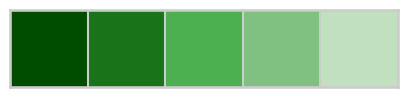

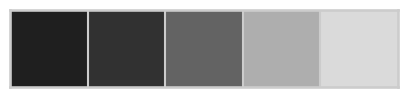

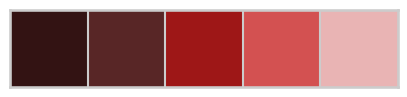

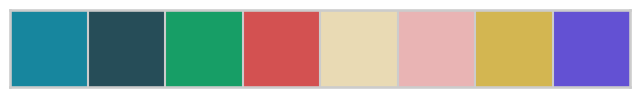

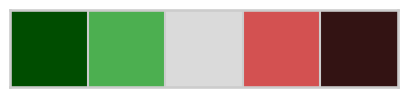

In [20]:
# Membuat Color pallete untuk mempercantik tampilan
colors_green = ["#004D00", "#197419", '#4CAF50', '#80C080', '#C0E0C0']
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_red = ["#331313", "#582626", '#9E1717', '#D35151', '#E9B4B4']
colors_mix = ["#17869E", '#264D58', '#179E66', '#D35151', '#E9DAB4', '#E9B4B4', '#D3B651', '#6351D3']
colors_div = ["#004D00", '#4CAF50', '#DADADA', '#D35151', '#331313']

sns.palplot(colors_green)
sns.palplot(colors_dark)
sns.palplot(colors_red)
sns.palplot(colors_mix)
sns.palplot(colors_div)

# MEMAHAMI POSISI INDONESIA

In [21]:
## Negara Indonesia berada diperingkat Berapa?
df_2022.loc[df_2022["Country"]=='Indonesia']


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
86,87,Indonesia,5.24,5.341,5.139,1.3,1.382,0.883,0.539,0.62,0.468,0.047


dapat dilihat bahwa negara Indonesia berada di peringkat 87 dunia dengan angka kebahagiaan sebesar 5.24.

In [22]:
## Secara Urutan ada di percentile berapa?
total_country = df_2022.shape[0]
rank_indo = df_2022.loc[df_2022["Country"]=='Indonesia', 'RANK'].values[0]

print(rank_indo / total_country)

0.5958904109589042


## PADA ASEAN

In [23]:
## dibandingkan Negara tentangga Indonesia di posisi keberapa?
ASEAN_country =  ["Brunei", "Cambodia", "Indonesia", "Laos", "Malaysia", "Myanmar", "Philippines", "Singapore", "Thailand", "Timor-Leste", "Vietnam"]

df_2022.loc[df_2022["Country"].isin(ASEAN_country)]

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
26,27,Singapore,6.480,6.569,6.392,0.932,2.149,1.127,0.851,0.672,0.163,0.587
59,60,Philippines,5.904,6.007,5.800,2.283,1.268,0.912,0.514,0.678,0.107,0.142
60,61,Thailand,5.891,5.994,5.788,1.600,1.535,1.096,0.697,0.617,0.321,0.026
69,70,Malaysia,5.711,5.845,5.578,1.471,1.689,0.938,0.620,0.654,0.213,0.126
76,77,Vietnam,5.485,5.570,5.400,1.735,1.252,0.932,0.611,0.707,0.143,0.105
86,87,Indonesia,5.240,5.341,5.139,1.300,1.382,0.883,0.539,0.620,0.468,0.047
94,95,Laos,5.140,5.263,5.018,1.709,1.239,0.654,0.479,0.679,0.197,0.184
113,114,Cambodia,4.640,4.765,4.516,1.410,1.019,0.732,0.505,0.740,0.166,0.068
125,126,Myanmar,4.394,4.511,4.277,0.877,1.038,0.829,0.491,0.513,0.452,0.194


di kawasan ASEAN (Asia Tenggara) Indonesia menempati peringkat ke 6 dari 9 negara.

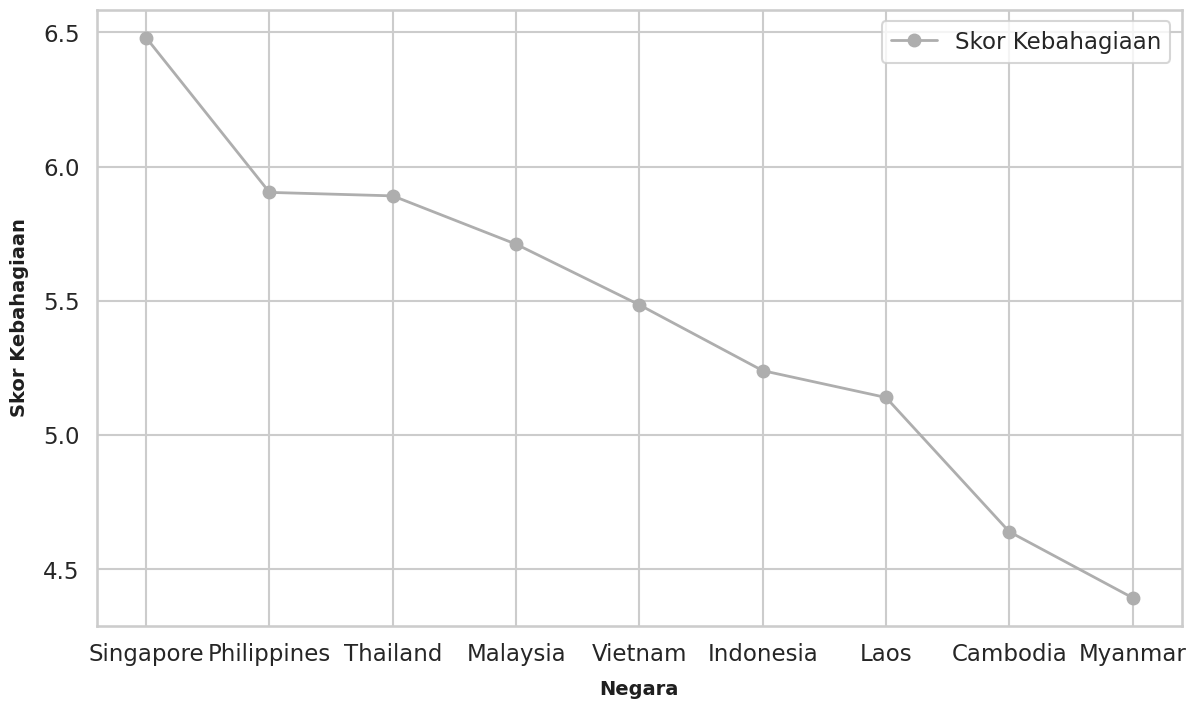

In [24]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara ASEAN
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik garis untuk menampilkan skor kebahagiaan di setiap negara ASEAN
line1, = ax.plot(df['Country'], df['Happiness score'], color=colors_dark[3], marker='o',
                 linestyle='-', linewidth=2, label='Skor Kebahagiaan')

# Mengatur label sumbu x
ax.set_xlabel("Negara", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

# Mengatur label sumbu y
ax.set_ylabel("Skor Kebahagiaan", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

# Menambahkan legenda
ax.legend()

# Menampilkan plot
plt.show()


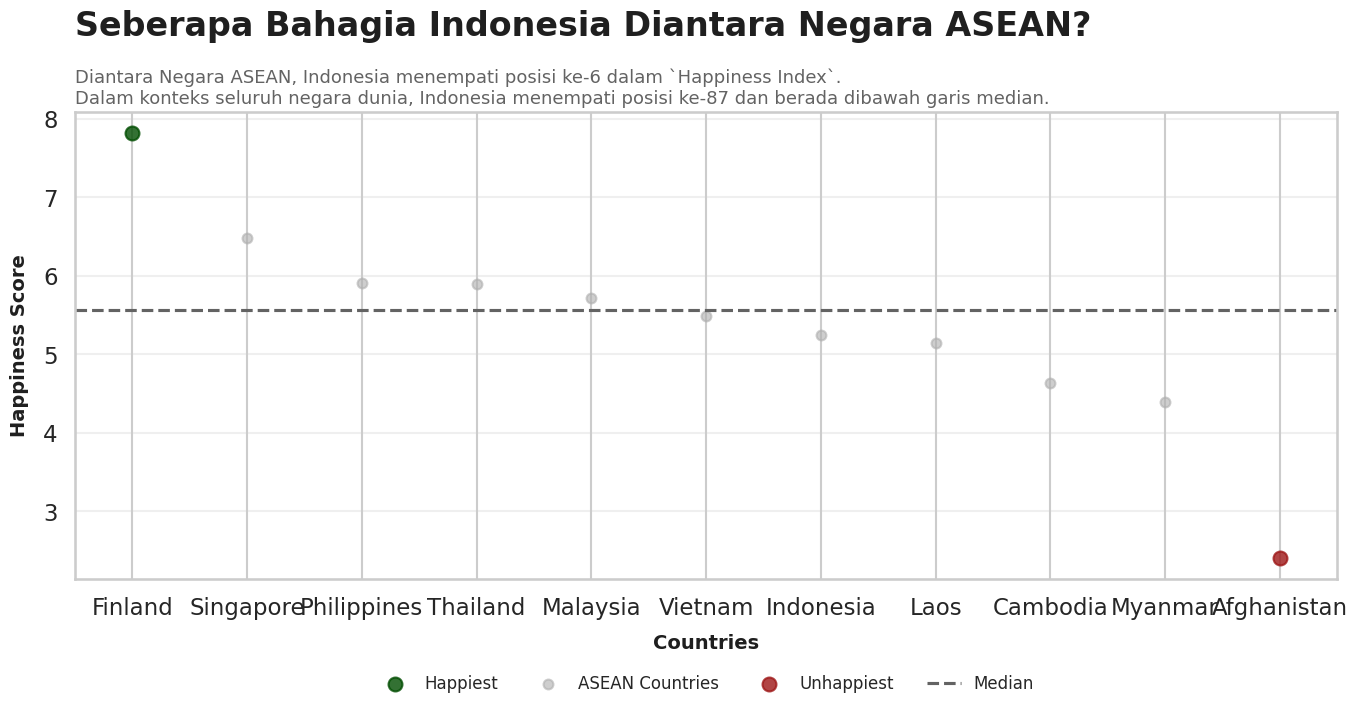

In [29]:
# Filter DataFrame df_2022 to include only ASEAN countries
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Retrieve the top row from df_2022, which might represent the country with the highest happiness score
df_2022_top = df_2022.iloc[0:1]

# Retrieve the last row from df_2022, which might represent the country with the lowest happiness score
df_2022_bot = df_2022.iloc[-1]

# Calculate the median happiness score from df_2022
median_score = df_2022['Happiness score'].median()

# Create a figure and subplots for the plot with specified size
fig, ax = plt.subplots(figsize=(14, 8))

# Create a scatter plot for the top happiness score country
scatter_top = ax.scatter(df_2022_top['Country'], df_2022_top['Happiness score'], s=100, color=colors_green[0], alpha=0.8, label='Happiest')

# Create a scatter plot for ASEAN countries
scatter_asean = ax.scatter(df['Country'], df['Happiness score'], s=50, color=colors_dark[3], alpha=0.6, label='ASEAN Countries')

# Create a scatter plot for the lowest happiness score country
scatter_bot = ax.scatter(df_2022_bot['Country'], df_2022_bot['Happiness score'], s=100, color=colors_red[2], alpha=0.8, label='Unhappiest')

# Add a horizontal line to indicate the median happiness score
line = ax.axhline(median_score, linestyle='--', color=colors_dark[2], label='Median')

# Add a legend for the plots
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, borderpad=1, frameon=False, fontsize=12)

# Add grid on the y-axis and set it to be behind the bars
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Set labels and styles for x and y-axis
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

# Get the x and y-axis limits
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Add text to the plot to provide context or additional information
plt.text(s="Seberapa Bahagia Indonesia Diantara Negara ASEAN?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])

# Add a title with information about Indonesia's position in ASEAN and globally
plt.title(f"Diantara Negara ASEAN, Indonesia menempati posisi ke-6 dalam `Happiness Index`.\nDalam konteks seluruh negara dunia, Indonesia menempati posisi ke-{rank_indo} dan berada dibawah garis median.", loc='left', fontsize=13, color=colors_dark[2])

# Adjust layout to prevent elements from being cut off
plt.tight_layout()

# Display the plot
plt.show()


In [30]:
df.RANK

26      27
59      60
60      61
69      70
76      77
86      87
94      95
113    114
125    126
Name: RANK, dtype: int64

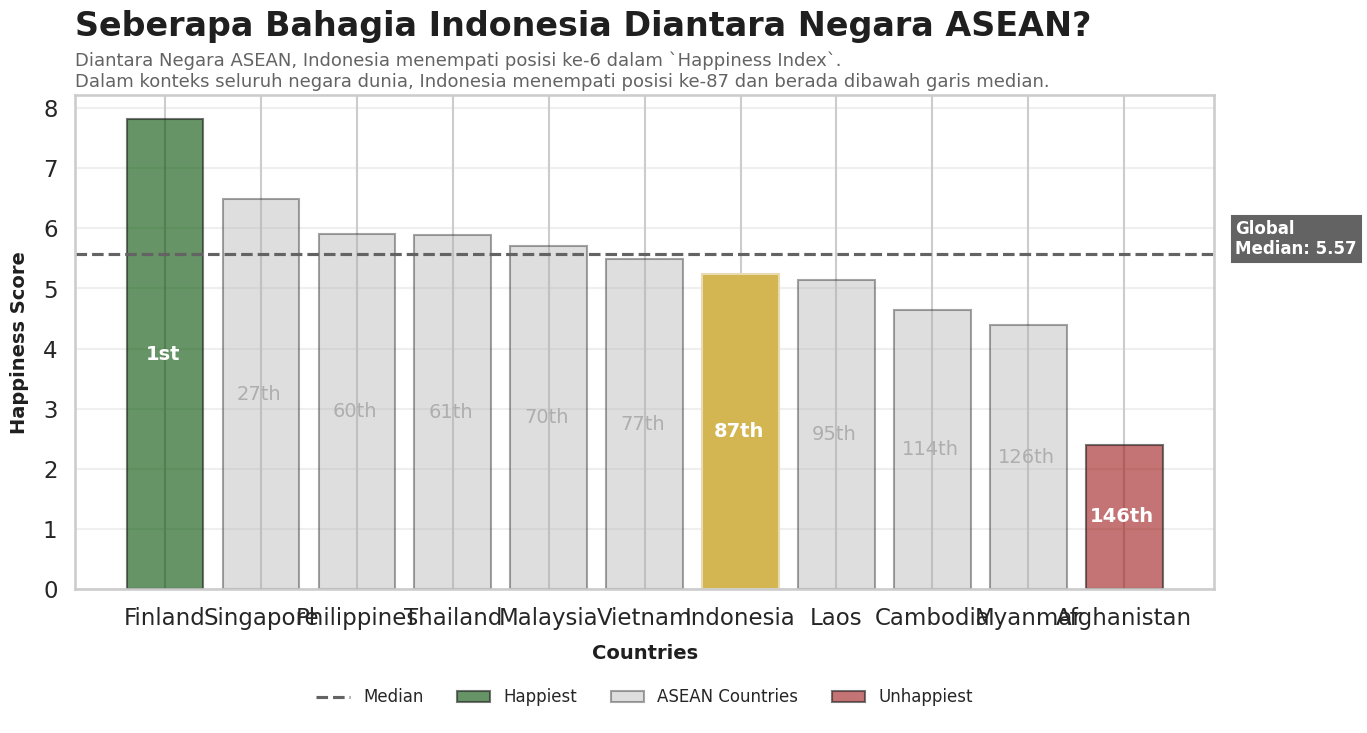

In [31]:
# Filter DataFrame df_2022 untuk hanya menyertakan negara-negara ASEAN
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Mengambil baris pertama dari df_2022 yang mungkin merepresentasikan negara dengan skor kebahagiaan tertinggi
df_2022_top = df_2022.iloc[0:1]

# Mengambil baris terakhir dari df_2022 yang mungkin merepresentasikan negara dengan skor kebahagiaan terendah
df_2022_bot = df_2022.iloc[-1]

# Menghitung skor kebahagiaan median dari df_2022
median_score = df_2022['Happiness score'].median()

# Membuat figur dan sumbu untuk plot dengan ukuran tertentu
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk negara dengan skor kebahagiaan tertinggi
bars0 = ax.bar(df_2022_top['Country'], df_2022_top['Happiness score'], color=colors_green[0], alpha=0.6, edgecolor=colors_dark[0])

# Membuat grafik bar untuk negara-negara ASEAN
bars1 = ax.bar(df['Country'], df['Happiness score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])

# Membuat grafik bar untuk negara dengan skor kebahagiaan terendah
bars2 = ax.bar(df_2022_bot['Country'], df_2022_bot['Happiness score'], color=colors_red[2], alpha=0.6, edgecolor=colors_dark[0])

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_dark[2])

# Menambahkan legenda untuk grafik
ax.legend(["Median", "Happiest", "ASEAN Countries", "Unhappiest"], loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, borderpad=1, frameon=False, fontsize=12)

# Menambahkan grid pada sumbu y dan mengatur agar grid berada di belakang bar
ax.grid(axis='y', alpha=0.3)
ax.set_axisbelow(True)

# Mengatur label dan gaya untuk sumbu x dan y
ax.set_xlabel("Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Mendapatkan ranking dari indeks negara-negara ASEAN dalam DataFrame dan menyesuaikannya dengan +1
sea_idx = list(df.index + 1)

# Menambahkan teks untuk menunjukkan skor median kebahagiaan global pada plot
avgl = ax.text(
    s="Global\nMedian: {:.2f}".format(median_score),  # Teks yang menampilkan skor median global dengan dua desimal
    x=xmax*1.02,  # Mengatur posisi teks di sumbu x, sedikit di luar batas maksimum x dari plot
    y=median_score,  # Mengatur posisi teks di sumbu y sesuai dengan nilai median_score
    backgroundcolor=colors_dark[2],  # Warna latar belakang teks
    fontsize=12,  # Ukuran font teks
    fontweight='bold',  # Membuat font tebal
    color='white'  # Warna teks
)

## Mengatur bar khusus (dalam kasus ini untuk Indonesia) di dalam bars1
# Meningkatkan opaqueness bar Indonesia menjadi 1 (tak transparan)
bars1[5].set_alpha(1)
# Mengatur warna bar Indonesia dengan warna spesifik dari colors_mix
bars1[5].set_color(colors_mix[6])
# Mengatur warna tepi bar Indonesia
bars1[5].set_edgecolor(colors_mix[4])


# Melakukan iterasi pada setiap baris dalam 'bars1' (ASEAN countries bars)
for i, bar in enumerate(bars1):
    # Mendapatkan posisi x dari bar
    x = bar.get_x()
    # Mendapatkan tinggi dari bar (yaitu, nilai skor kebahagiaan)
    y = bar.get_height()

    # Jika indeks tidak sama dengan 5 (kondisi khusus untuk bar tertentu, mungkin Indonesia)
    if i != 5:
        # Menambahkan teks pada posisi tertentu di atas bar
        ax.text(
            s=f"{sea_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color=colors_dark[3],  # Warna teks
            fontsize=14,  # Ukuran font teks
        )
    else:
        # Untuk bar dengan indeks 5, menggunakan format teks yang berbeda
        ax.text(
            s=f"{sea_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color='white',  # Warna teks
            fontsize=14,  # Ukuran font teks
            fontweight='bold'  # Membuat font tebal
        )

# Melakukan iterasi pada setiap bar dalam 'bars0' (bar untuk negara paling bahagia)
for i, bar in enumerate(bars0):
    # Mendapatkan posisi x dan y dari bar
    x = bar.get_x(),
    y = bar.get_height(),

    # Menambahkan teks pada posisi tertentu di atas bar
    ax.text(
        s=f"1st",  # Teks yang menampilkan "1st" untuk negara paling bahagia
        va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
        x=x[0]+0.38, y=y[0]/2,  # Mengatur posisi teks relatif terhadap bar
        color="white",  # Warna teks
        fontsize=14,  # Ukuran font teks
        fontweight='bold',  # Membuat font tebal
        alpha=1,  # Opaqueness dari teks
    )

# Melakukan iterasi pada setiap bar dalam 'bars2' (bar untuk negara paling tidak bahagia)
for i, bar in enumerate(bars2):
    # Mendapatkan posisi x dan y dari bar
    x = bar.get_x(),
    y = bar.get_height(),

    # Menambahkan teks pada posisi tertentu di atas bar
    ax.text(
        s="146th",  # Teks yang menampilkan "146th" untuk negara paling tidak bahagia
        va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
        x=x[0]+0.38, y=y[0]/2,  # Mengatur posisi teks relatif terhadap bar
        color="white",  # Warna teks
        fontsize=14,  # Ukuran font teks
        fontweight='bold',  # Membuat font tebal
        alpha=1,  # Opaqueness dari teks
    )

# Menambahkan teks pada grafik untuk memberikan konteks atau informasi tambahan
plt.text(s="Seberapa Bahagia Indonesia Diantara Negara ASEAN?", ha='left', x=xmin, y=ymax*1.12, fontsize=24, fontweight='bold', color=colors_dark[0])

# Menambahkan judul dengan informasi posisi Indonesia dalam konteks ASEAN dan global
plt.title(f"Diantara Negara ASEAN, Indonesia menempati posisi ke-6 dalam `Happiness Index`.\nDalam konteks seluruh negara dunia, Indonesia menempati posisi ke-{rank_indo} dan berada dibawah garis median.", loc='left', fontsize=13, color=colors_dark[2])

# Mengatur layout agar tidak ada elemen yang terpotong
plt.tight_layout()

# Menampilkan plot
plt.show()

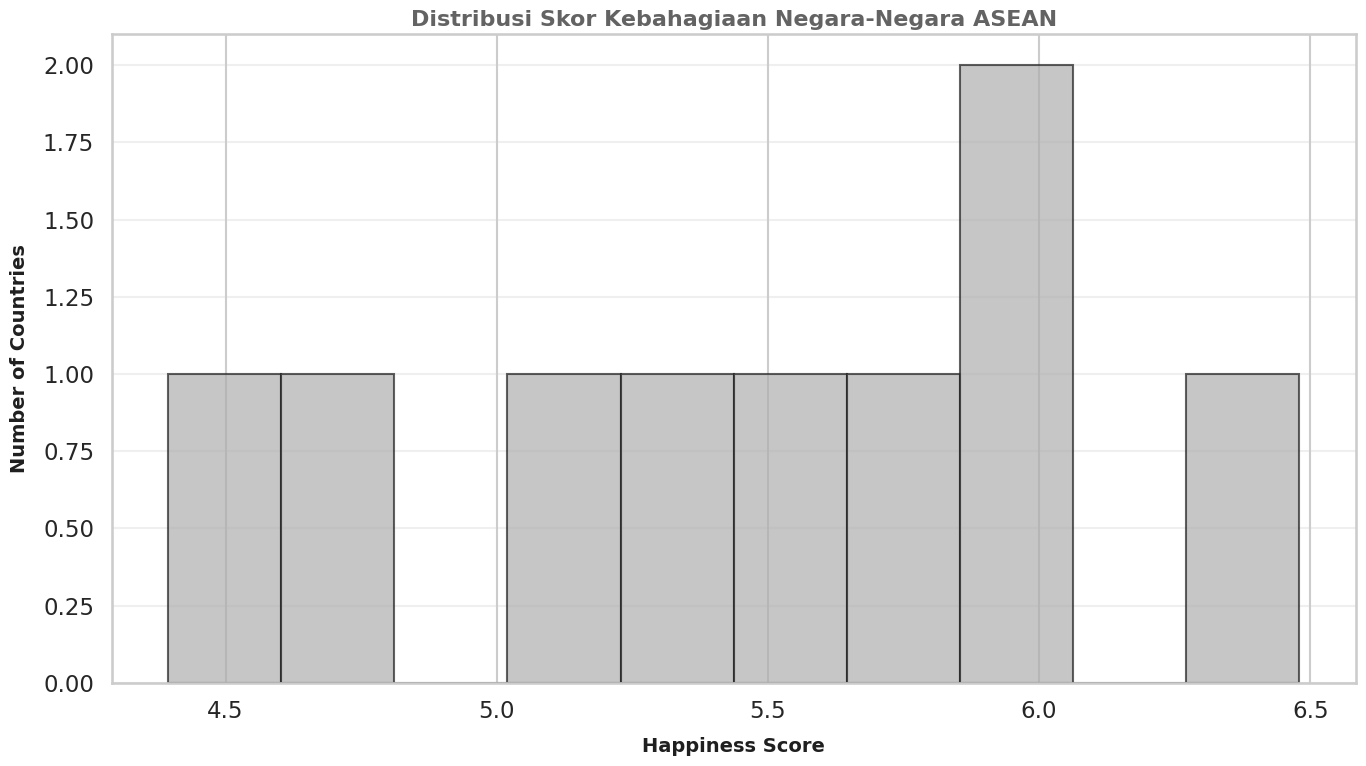

In [32]:
# Filter DataFrame df_2022 to include only ASEAN countries
df = df_2022[df_2022['Country'].isin(ASEAN_country)]

# Calculate the number of bins for the histogram
num_bins = 10

# Create a figure and subplots for the plot with specified size
fig, ax = plt.subplots(figsize=(14, 8))

# Create a histogram of the happiness scores
hist_plot = ax.hist(df['Happiness score'], bins=num_bins, color=colors_dark[3], edgecolor=colors_dark[0], alpha=0.7)

# Add labels and title for the x and y-axis
ax.set_xlabel("Happiness Score", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])
ax.set_ylabel("Number of Countries", fontsize=14, labelpad=10, fontweight='bold', color=colors_dark[0])

# Add a title to the histogram
ax.set_title("Distribusi Skor Kebahagiaan Negara-Negara ASEAN", fontsize=16, fontweight='bold', color=colors_dark[2])

# Set grid on the y-axis
ax.grid(axis='y', alpha=0.3)

# Adjust layout to prevent elements from being cut off
plt.tight_layout()

# Display the histogram
plt.show()


## PADA AFC

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
# Mendefinisikan path ke folder tempat file CSV disimpan
path_file_2022 = os.path.join(folder_path, '2022.csv')

# Membaca file CSV dan menyimpan isi ke dalam DataFrame sesuai dengan value `path_file_2022`
df_2022 = pd.read_csv(path_file_2022)

In [80]:
# drop Country tanpa Happiness Score
df_2022 = df_2022.dropna()

# mendapatkan kolom `object`
obj_col = df_2022.select_dtypes(include=['O']).columns

# Mendapatkan semua kolom kecuali 'RANK' dan 'Country'
columns = [col for col in obj_col if col not in ['RANK', 'Country']]

# Convert kolom numeric yang awalnya `object` menjadi `float`
for col in columns:
    df_2022.loc[:, col] = df_2022[col].str.replace(',', '.').astype(float)

In [81]:
# Memfilter DataFrame df_2022 untuk hanya memasukkan data dari negara-negara AFC 2024
afc_countries = ["Qatar", "Indonesia", "Australia", "Jordan", "South Korea",
                 "Japan", "China", "United Arab Emirates", "Iraq", "Saudi Arabia",
                 "Tajikistan", "Thailand", "Uzbekistan", "Vietnam", "Kuwait*", "Malaysia"]

afc_df = df_2022.loc[df_2022['Country'].isin(afc_countries)]

In [82]:
set(afc_countries) - set(afc_df.Country)

{'Qatar'}

In [83]:
afc_df.loc[afc_df['Country']=='United Arab Emirates', 'Country'] = 'UAE'
afc_df.loc[afc_df['Country']=='Kuwait*', 'Country'] = 'Kuwait'

<ipython-input-84-5d52f79e6465>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(afc_df['Country'], rotation=45, ha="right")


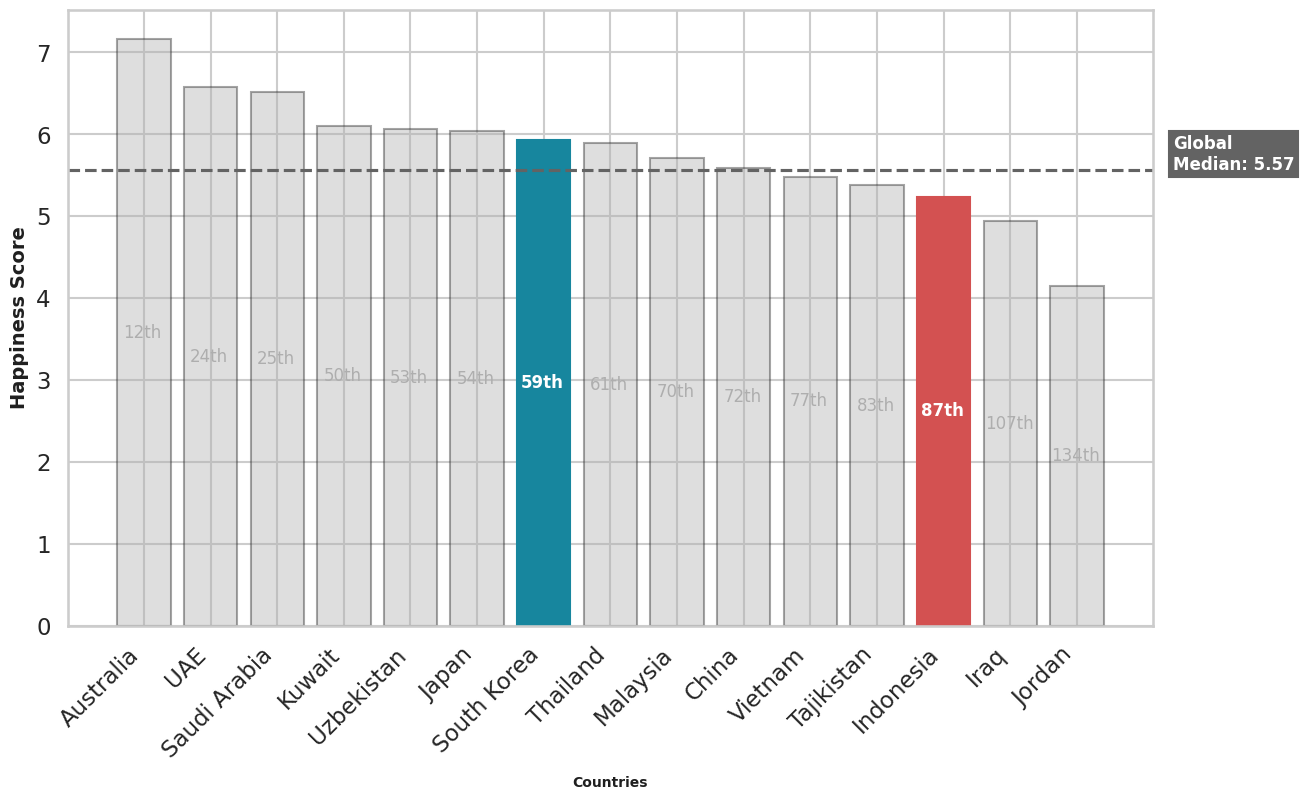

In [84]:
# Menghitung skor kebahagiaan median dari df_2022
median_score = df_2022['Happiness score'].median()

afc_idx = list(afc_df.index + 1)

# Membuat figur dan sumbu untuk plot
fig, ax = plt.subplots(figsize=(14, 8))

# Membuat grafik bar untuk menampilkan skor kebahagiaan di setiap negara ASEAN
bars1 = ax.bar(afc_df['Country'], afc_df['Happiness score'], color=colors_dark[3], alpha=0.4, edgecolor=colors_dark[0])

# Meningkatkan opaqueness bar Korea menjadi 1 (tak transparan)
bars1[6].set_alpha(1)
# Mengatur warna bar Korea dengan warna spesifik dari colors_mix
bars1[6].set_color(colors_mix[0])
# Mengatur warna tepi bar Korea
bars1[6].set_edgecolor(colors_mix[0])

# Meningkatkan opaqueness bar Korea menjadi 1 (tak transparan)
bars1[12].set_alpha(1)
# Mengatur warna bar Korea dengan warna spesifik dari colors_mix
bars1[12].set_color(colors_mix[3])
# Mengatur warna tepi bar Korea
bars1[12].set_edgecolor(colors_mix[3])

# Rotate x-axis labels
ax.set_xticklabels(afc_df['Country'], rotation=45, ha="right")

# Mengatur label sumbu x
ax.set_xlabel("Countries", fontsize=10, labelpad=10, fontweight='bold', color=colors_dark[0])

# Mengatur label sumbu y
ax.set_ylabel("Happiness Score", fontsize=14, labelpad=5, fontweight='bold', color=colors_dark[0])

# Mendapatkan batas-batas untuk sumbu x dan y
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()

# Menambahkan teks untuk menunjukkan skor median kebahagiaan global pada plot
avgl = ax.text(
    s="Global\nMedian: {:.2f}".format(median_score),  # Teks yang menampilkan skor median global dengan dua desimal
    x=xmax*1.02,  # Mengatur posisi teks di sumbu x, sedikit di luar batas maksimum x dari plot
    y=median_score,  # Mengatur posisi teks di sumbu y sesuai dengan nilai median_score
    backgroundcolor=colors_dark[2],  # Warna latar belakang teks
    fontsize=12,  # Ukuran font teks
    fontweight='bold',  # Membuat font tebal
    color='white'  # Warna teks
)

# Menambahkan garis horizontal untuk menandakan skor kebahagiaan median
line  = ax.axhline(median_score, linestyle='--', color=colors_dark[2])

# Melakukan iterasi pada setiap baris dalam 'bars1' (ASEAN countries bars)
for i, bar in enumerate(bars1):
    # Mendapatkan posisi x dari bar
    x = bar.get_x()
    # Mendapatkan tinggi dari bar (yaitu, nilai skor kebahagiaan)
    y = bar.get_height()

    # Jika indeks tidak sama dengan 6 atau 12 (kondisi khusus untuk bar tertentu, mungkin Indonesia)
    if i not in [6,12]:
        # Menambahkan teks pada posisi tertentu di atas bar
        ax.text(
            s=f"{afc_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color=colors_dark[3],  # Warna teks
            fontsize=12,  # Ukuran font teks
        )
    else:
        # Untuk bar dengan indeks 6 atau 12, menggunakan format teks yang berbeda
        ax.text(
            s=f"{afc_idx[i]}th",  # Teks yang menampilkan peringkat
            va='center', ha='center',  # Menyelaraskan teks secara vertikal dan horizontal
            x=x+0.38, y=y/2,  # Mengatur posisi teks relatif terhadap bar
            color='white',  # Warna teks
            fontsize=12,  # Ukuran font teks
            fontweight='bold'  # Membuat font tebal
        )

# Menampilkan plot
plt.show()

In [85]:
afc_df

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
11,12,Australia,7.162,7.244,7.081,2.011,1.9,1.203,0.772,0.676,0.258,0.341
23,24,UAE,6.576,6.66,6.492,1.809,1.998,0.98,0.633,0.702,0.204,0.25
24,25,Saudi Arabia,6.523,6.637,6.409,2.075,1.87,1.092,0.577,0.651,0.078,0.18
49,50,Kuwait,6.106,6.235,5.977,1.621,1.904,0.983,0.747,0.617,0.087,0.147
52,53,Uzbekistan,6.063,6.178,5.948,1.913,1.219,1.092,0.6,0.716,0.283,0.24
53,54,Japan,6.039,6.119,5.959,1.487,1.835,1.089,0.866,0.537,0.007,0.218
58,59,South Korea,5.935,6.021,5.849,1.656,1.851,0.886,0.841,0.414,0.111,0.176
60,61,Thailand,5.891,5.994,5.788,1.6,1.535,1.096,0.697,0.617,0.321,0.026
69,70,Malaysia,5.711,5.845,5.578,1.471,1.689,0.938,0.62,0.654,0.213,0.126
71,72,China,5.585,5.65,5.52,1.516,1.508,0.958,0.705,0.656,0.099,0.142


In [86]:
afc_df.columns

Index(['RANK', 'Country', 'Happiness score', 'Whisker-high', 'Whisker-low',
       'Dystopia (1.83) + residual', 'Explained by: GDP per capita',
       'Explained by: Social support', 'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption'],
      dtype='object')

In [89]:
# Filter rows for South Korea and Indonesia
countries = ['South Korea', 'Indonesia']
df_plot = afc_df[afc_df['Country'].isin(countries)]
for i , r in df_plot.iterrows():
  print(r)

RANK                                                   59
Country                                       South Korea
Happiness score                                     5.935
Whisker-high                                        6.021
Whisker-low                                         5.849
Dystopia (1.83) + residual                          1.656
Explained by: GDP per capita                        1.851
Explained by: Social support                        0.886
Explained by: Healthy life expectancy               0.841
Explained by: Freedom to make life choices          0.414
Explained by: Generosity                            0.111
Explained by: Perceptions of corruption             0.176
Name: 58, dtype: object
RANK                                                 87
Country                                       Indonesia
Happiness score                                    5.24
Whisker-high                                      5.341
Whisker-low                                       5.139


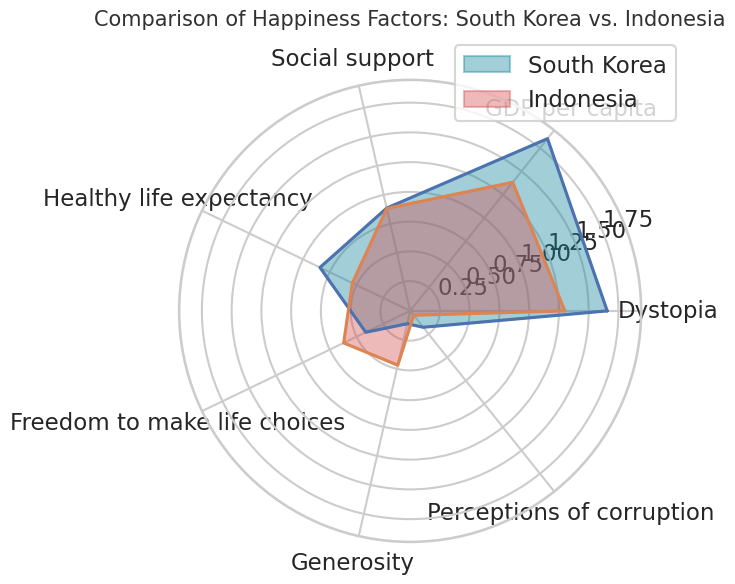

In [90]:
# Filter rows for South Korea and Indonesia
countries = ['South Korea', 'Indonesia']
df_plot = afc_df[afc_df['Country'].isin(countries)]

# Columns to include in the radar chart
columns = ['Dystopia (1.83) + residual', 'Explained by: GDP per capita',
           'Explained by: Social support', 'Explained by: Healthy life expectancy',
           'Explained by: Freedom to make life choices',
           'Explained by: Generosity', 'Explained by: Perceptions of corruption']

# Number of variables we're plotting.
num_vars = len(columns)

# Compute angle each bar is centered on:
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop by appending the first angle at the end.

# Draw the radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))

for k, (idx, row) in enumerate(df_plot.iterrows()):
    data = row[columns].tolist() + row[columns].tolist()[:1]  # Complete the loop
    ax.fill(angles, data, alpha=0.4, label=row['Country'], color=colors_mix[3*k], edgecolor=colors_mix[3*k])
    ax.plot(angles, data)

# Labels for each point
ax.set_xticks(angles[:-1])
col_name = ['Dystopia', 'GDP per capita',
           'Social support', 'Healthy life expectancy',
           'Freedom to make life choices',
           'Generosity', 'Perceptions of corruption']
ax.set_xticklabels(col_name)

# Title and legend
plt.title('Comparison of Happiness Factors: South Korea vs. Indonesia', size=15, color=colors_dark[1], y=1.1)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))
plt.show()

In [93]:
row

RANK                                                 87
Country                                       Indonesia
Happiness score                                    5.24
Whisker-high                                      5.341
Whisker-low                                       5.139
Dystopia (1.83) + residual                          1.3
Explained by: GDP per capita                      1.382
Explained by: Social support                      0.883
Explained by: Healthy life expectancy             0.539
Explained by: Freedom to make life choices         0.62
Explained by: Generosity                          0.468
Explained by: Perceptions of corruption           0.047
Name: 86, dtype: object